<a href="https://colab.research.google.com/github/taufixhdyt/Machine-Learning-Fundamentals/blob/main/Praktikum7_.G.211.21.0103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime  import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('AirPassengers.csv')
data.shape

(144, 2)

In [ ]:
data["Month"]=pd.to_datetime(data['Month'],infer_datetime_format=True)
data=data.set_index(['Month'])
data.head

<bound method NDFrame.head of             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]>

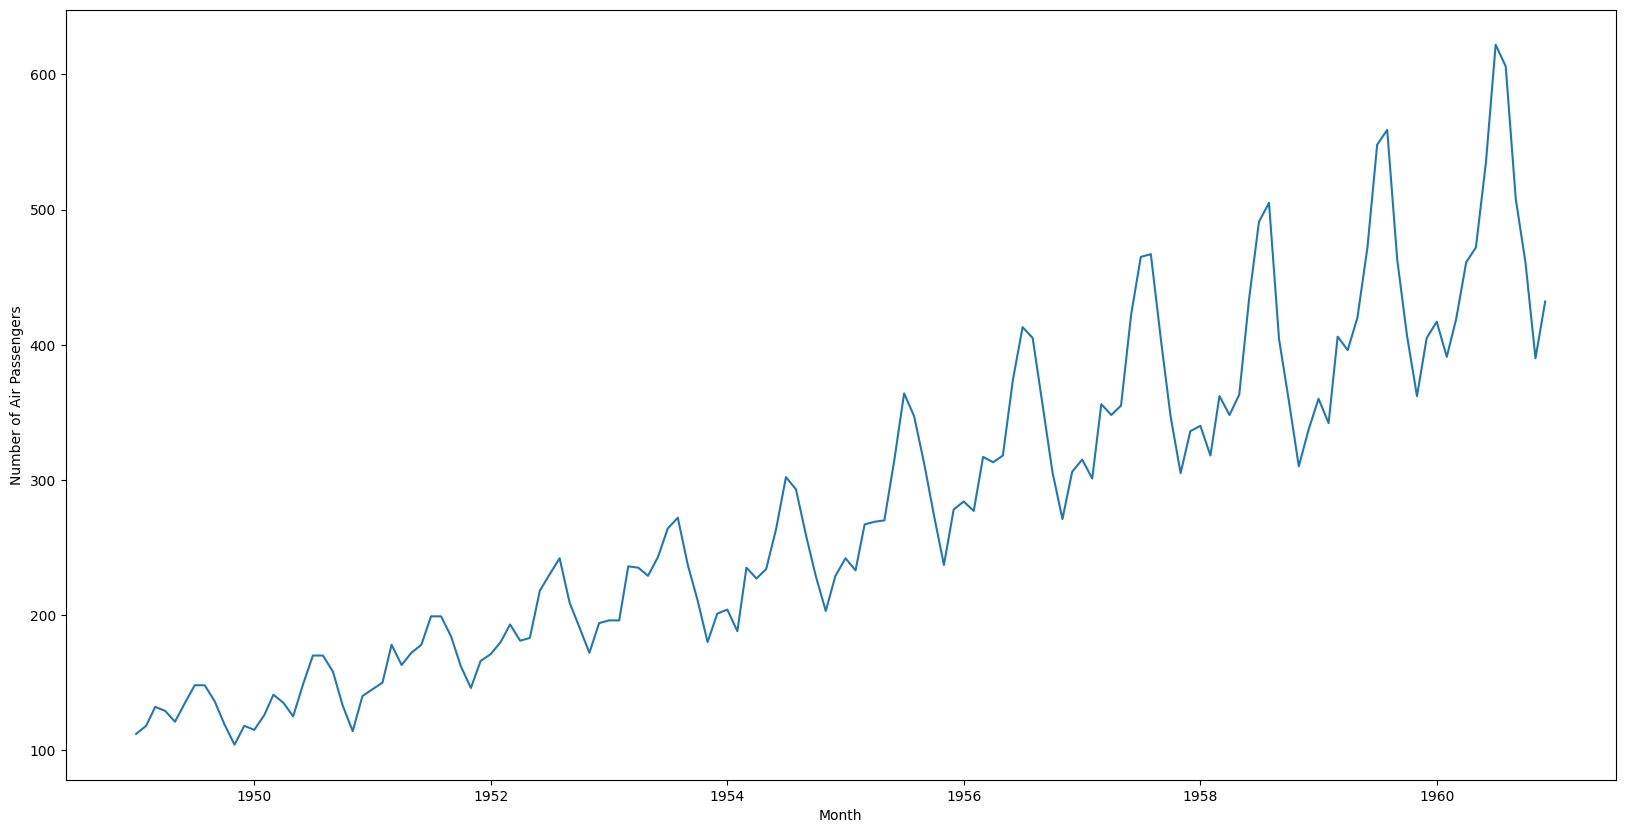

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [ ]:
rolmean = data.rolling(window = 12).mean()
rolstd = data.rolling(window = 12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977


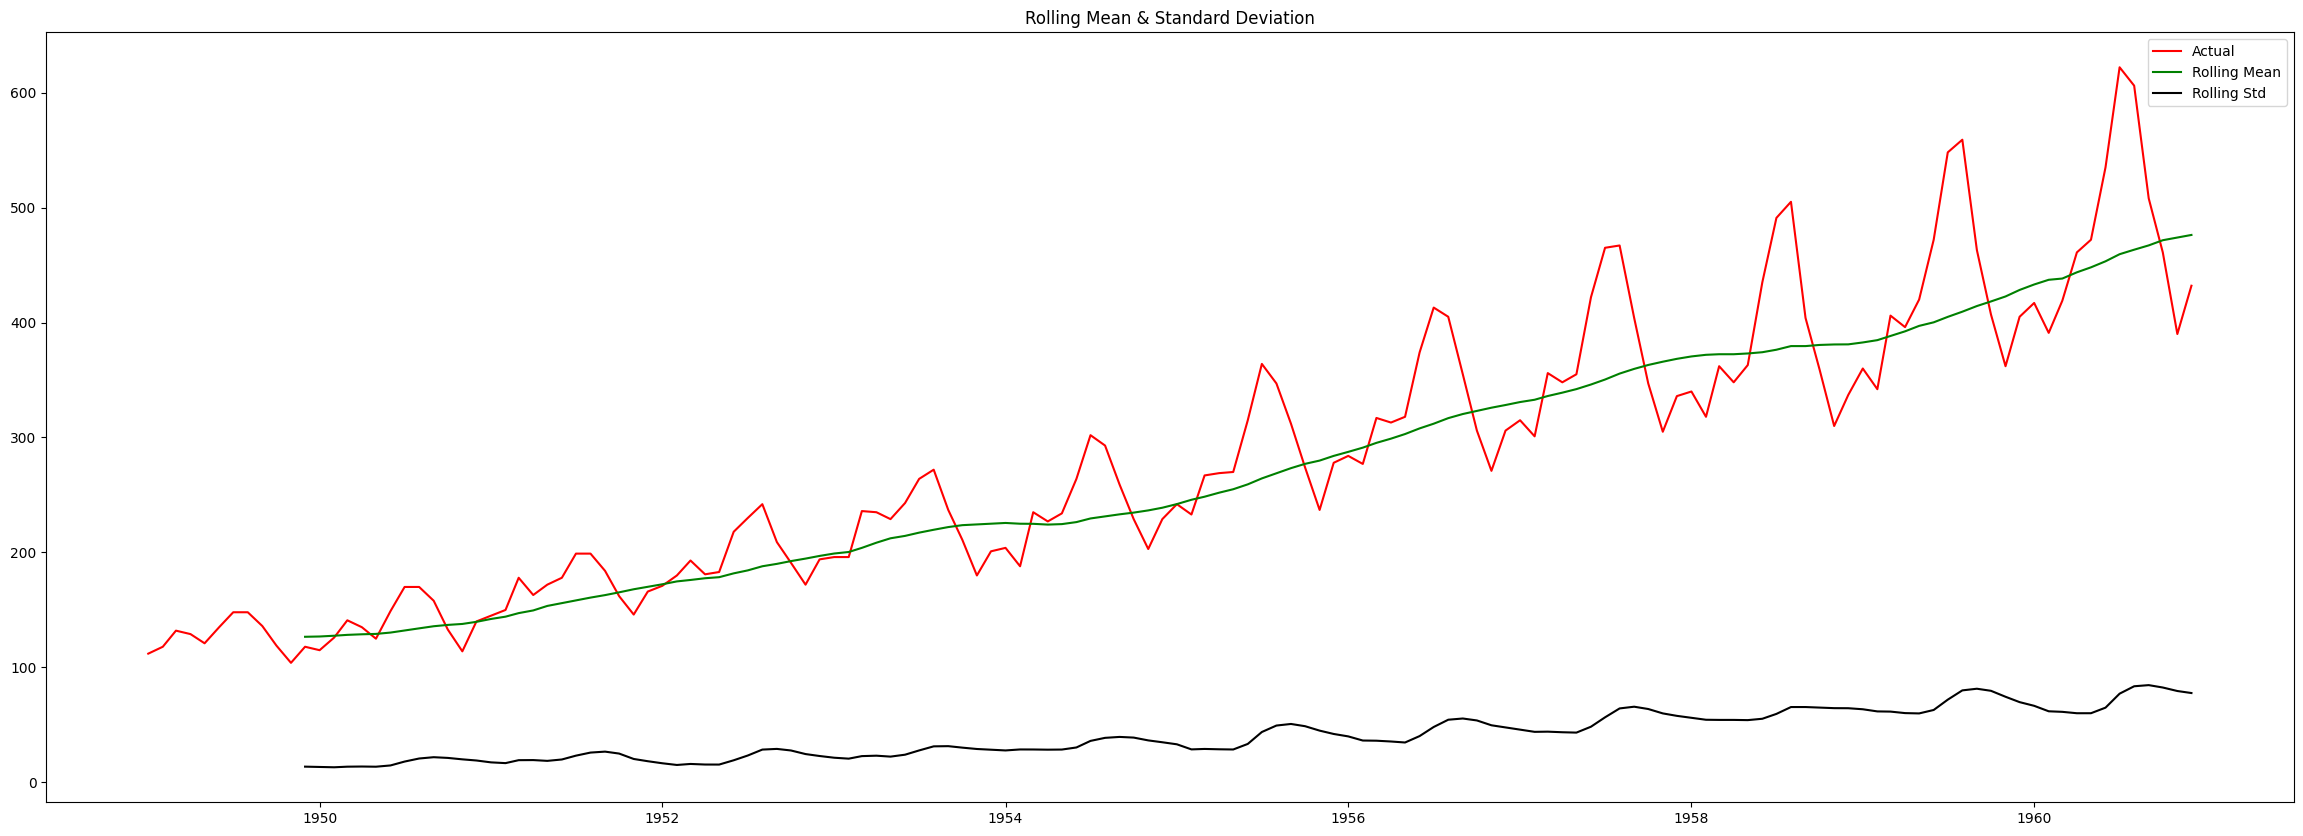

In [ ]:
plt.figure(figsize = (29,10))
actual = plt.plot(data, color='red', label = 'Actual')
mean_6 = plt.plot(rolmean, color = 'green', label = 'Rolling Mean')
std_6 = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest = adfuller(data['Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'No. of Obs'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


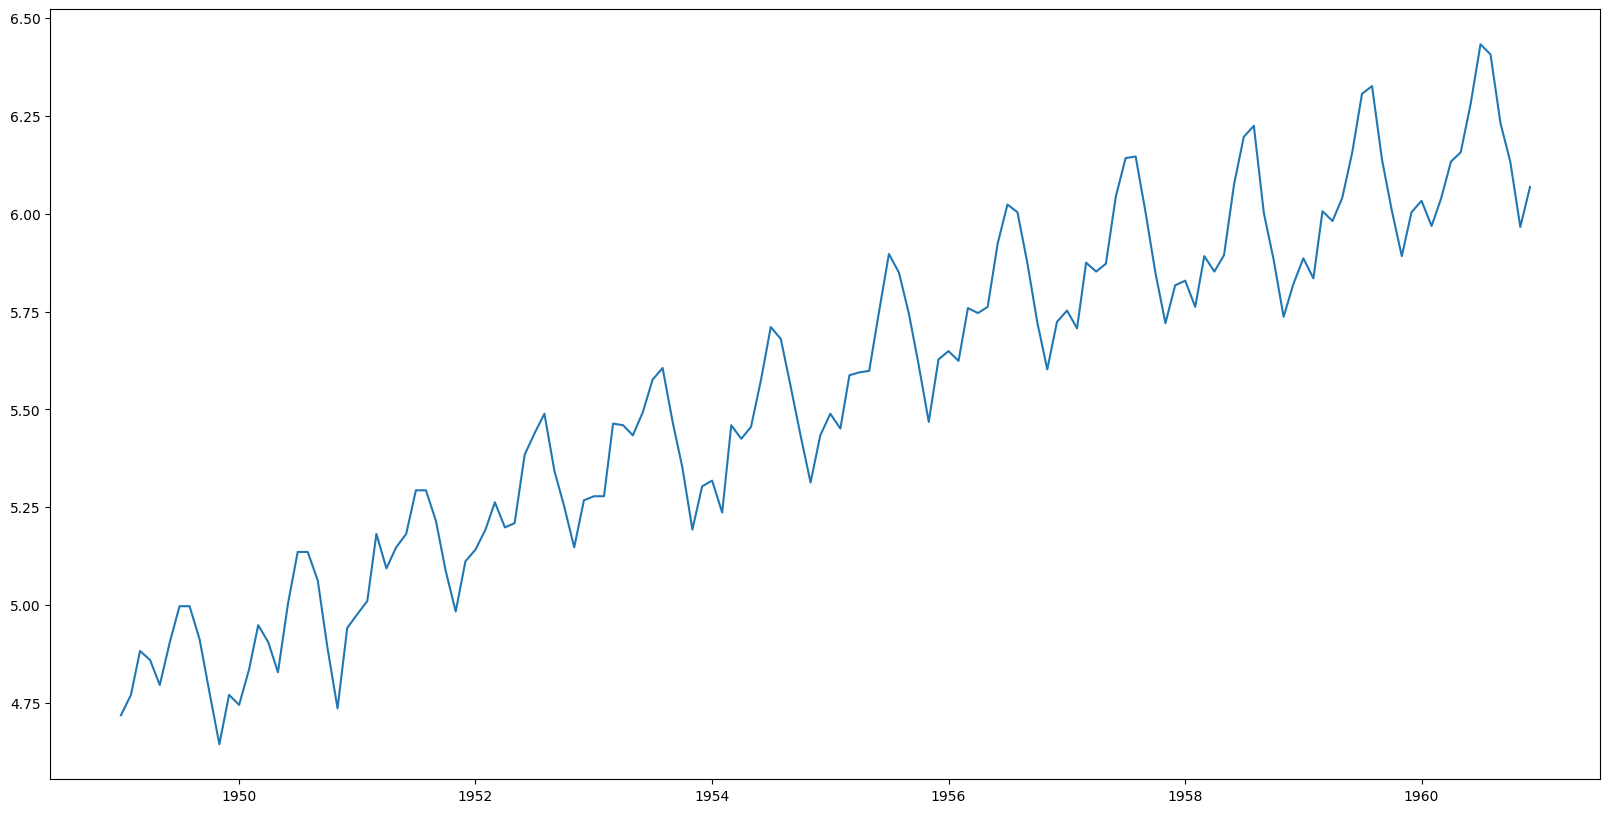

In [ ]:
plt.figure(figsize = (20,10))
data_log = np.log(data)
plt.plot(data_log)


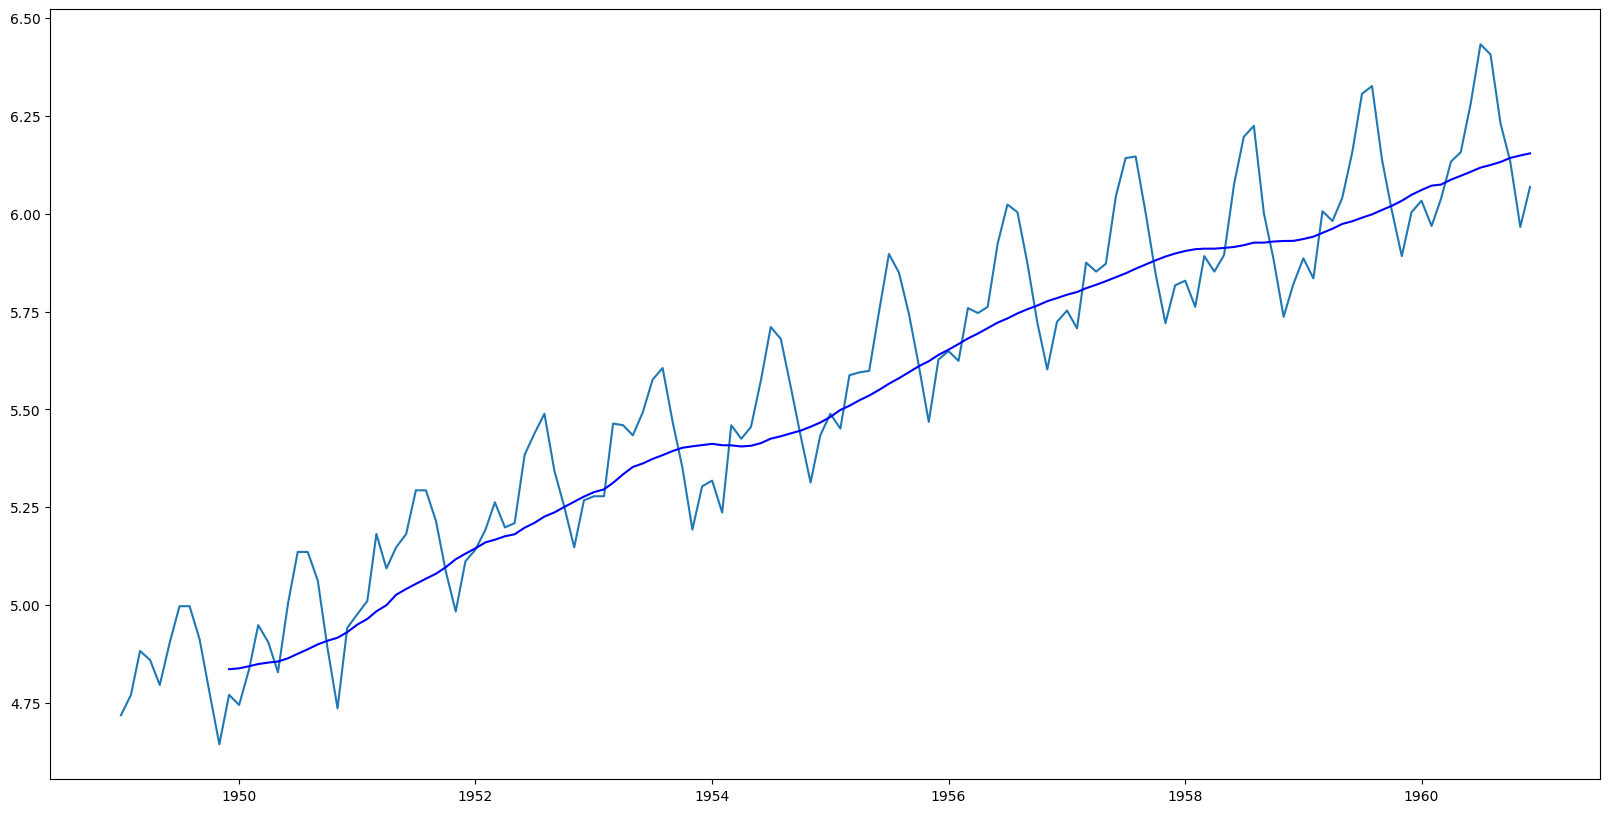

In [ ]:
plt.figure(figsize=(20,10))
MAvg = data_log.rolling(window = 12).mean()
MStd = data_log.rolling(window = 12).std()
plt.plot(data_log)
plt.plot(MAvg, color = 'blue')

In [ ]:
data_log_diff = data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
data_log_diff = data_log_diff.dropna()
data_log_diff.head()


,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
def stationarity(timeseries):

  rolmean = timeseries.rolling(window = 12).mean()
  rolstd = timeseries.rolling(window = 12).std()

  plt.figure(figsize = (20, 10))
  actual = plt.plot(timeseries, color='red', label = 'Actual')
  mean_6 = plt.plot(rolmean, color = 'green', label = 'Rolling Mean')
  std_6 = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block = False)

  print('Dickey-Fuller Test: ')
  dftest = adfuller(timeseries['Passengers'], autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'No. of Obs'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
  print(dfoutput)

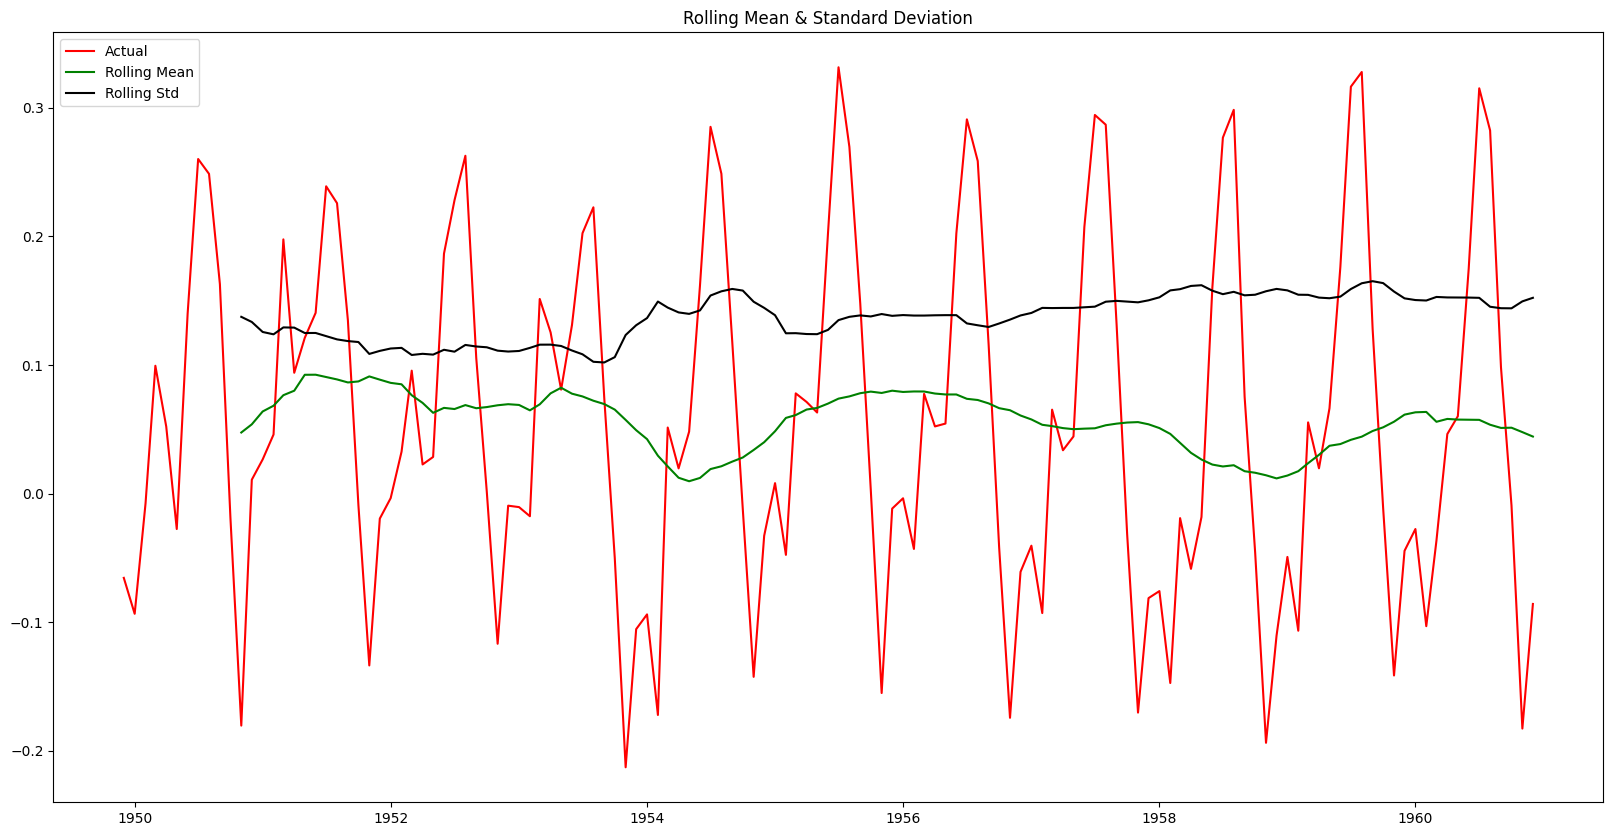

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [ ]:
stationarity(data_log_diff)

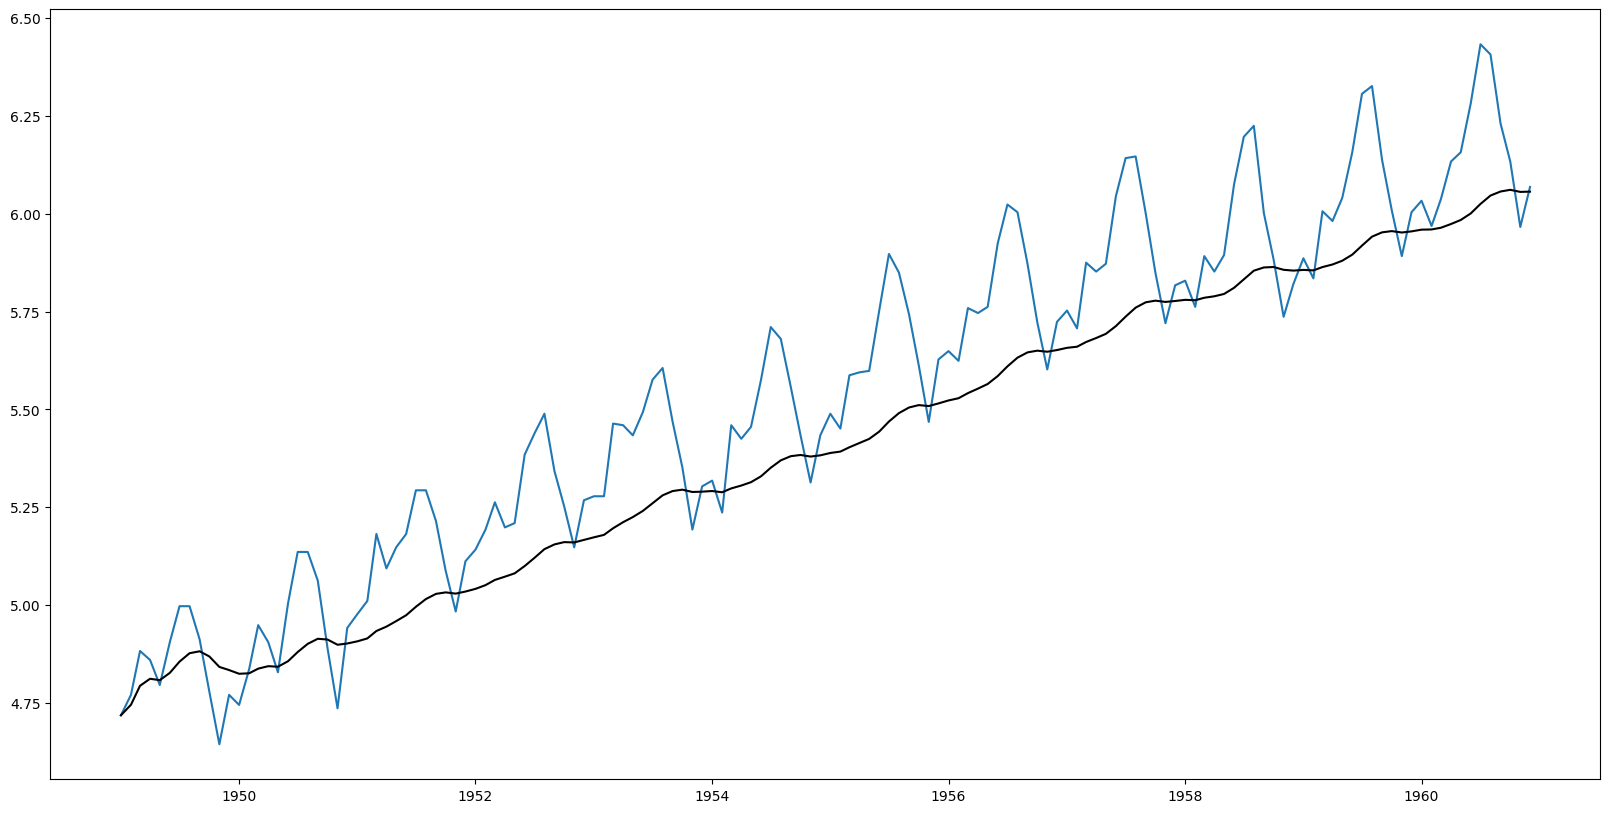

In [ ]:
plt.figure(figsize = (20,10))
exp_data = data_log.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(data_log)
plt.plot(exp_data, color = 'black')

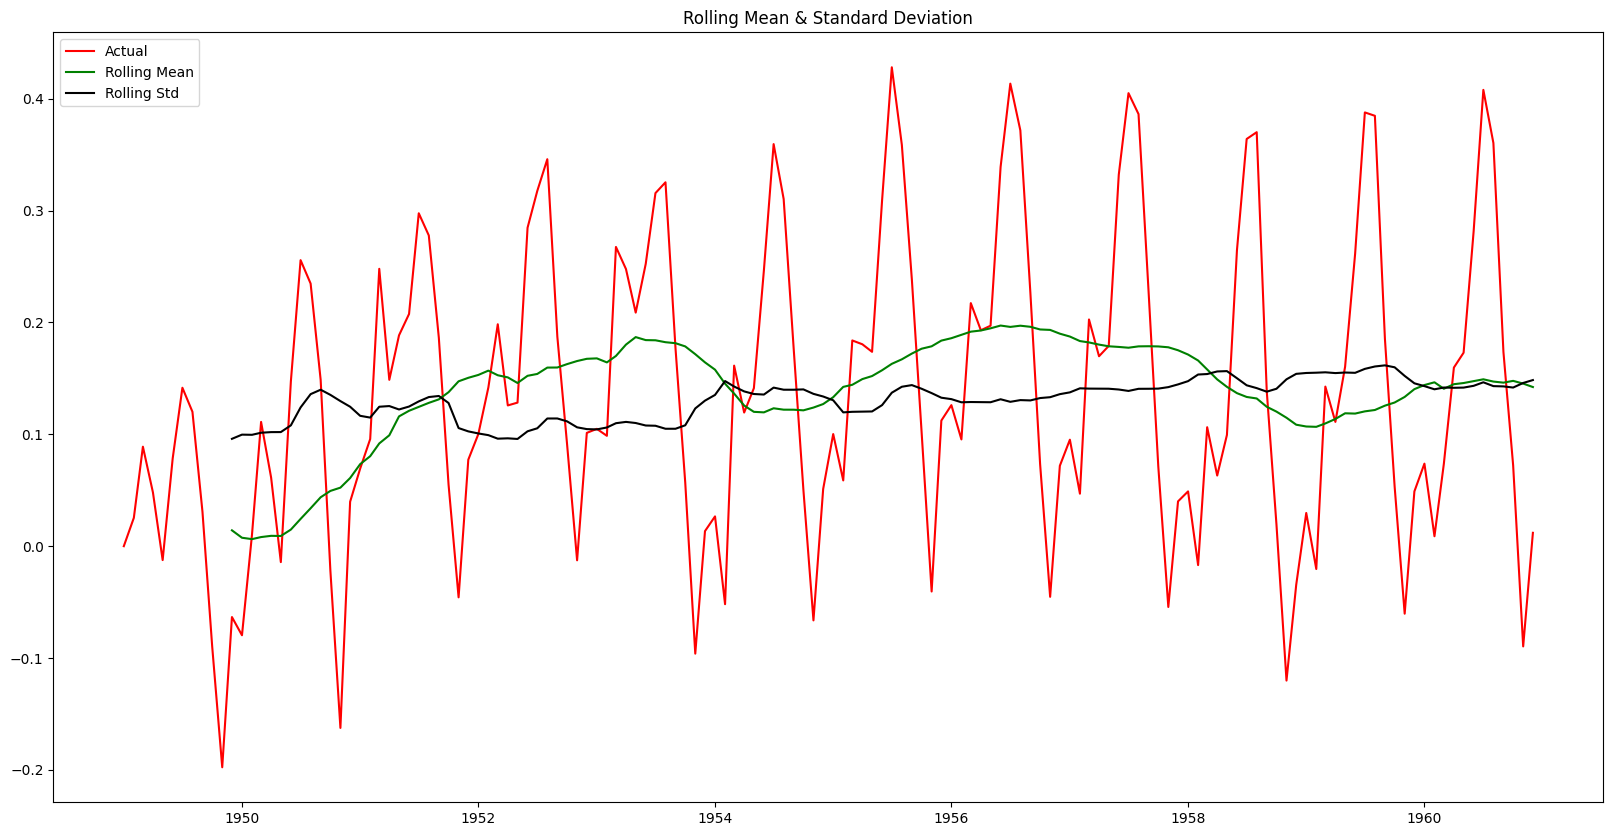

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [ ]:
exp_data_diff = data_log-exp_data
stationarity(exp_data_diff)


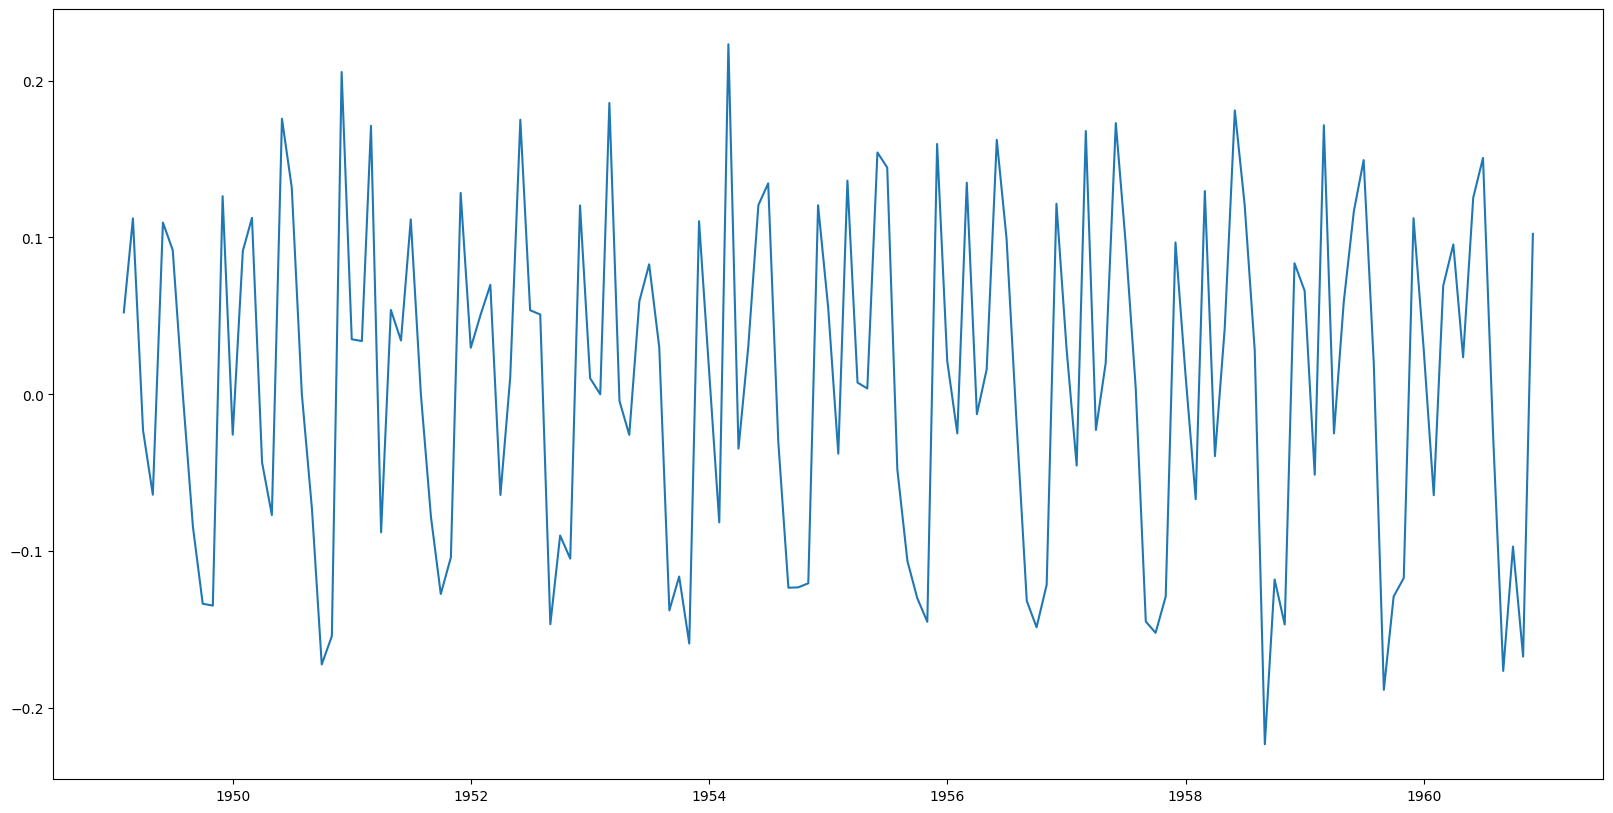

In [ ]:
plt.figure(figsize = (20,10))
data_shift = data_log-data_log.shift()
plt.plot(data_shift)

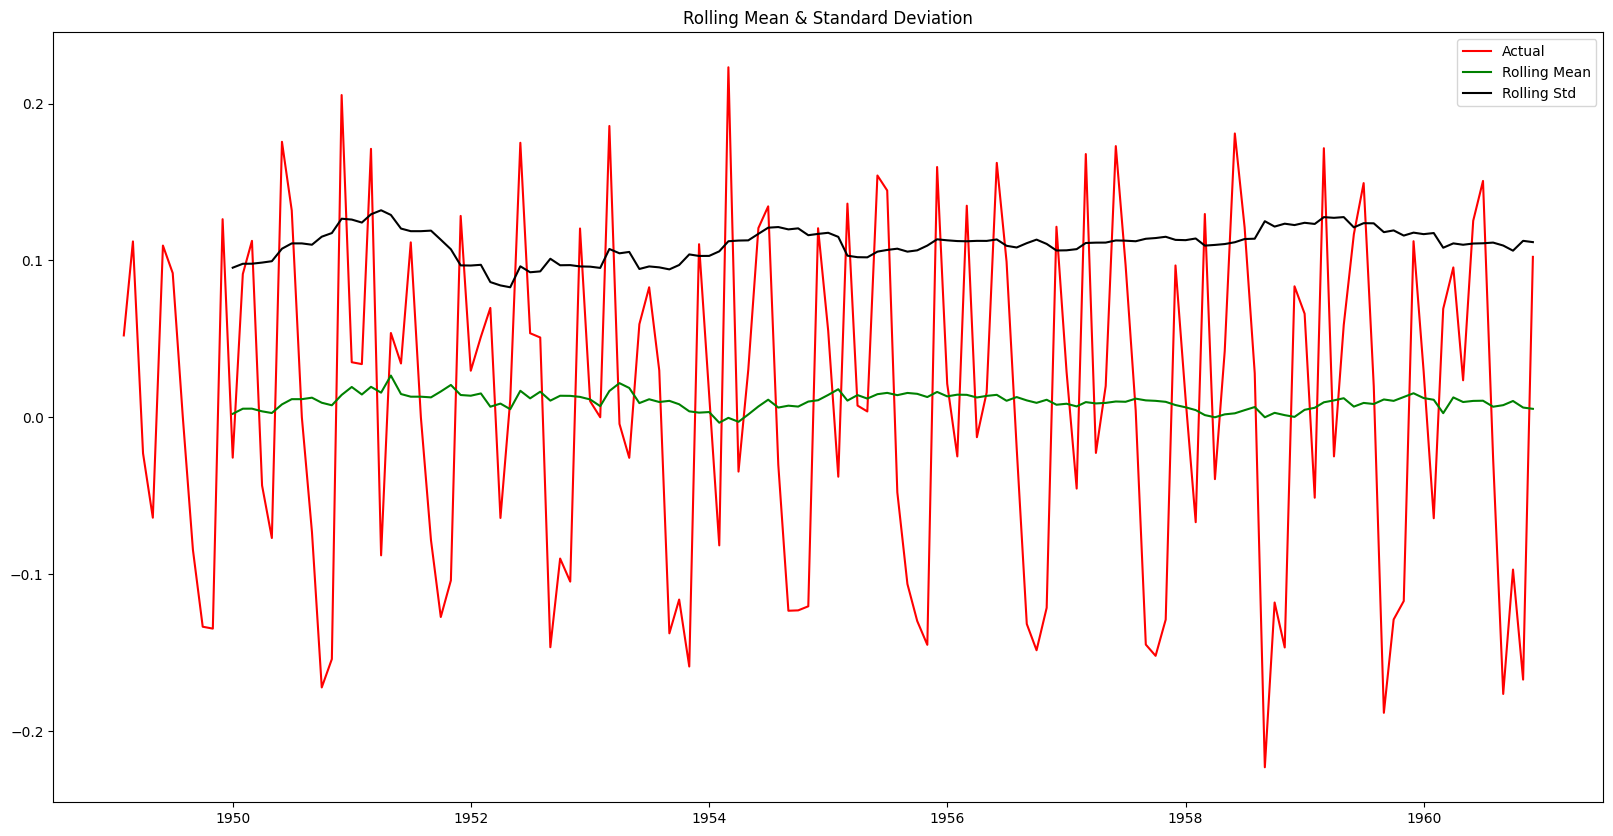

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [ ]:
data_shift=data_shift.dropna()
stationarity(data_shift)

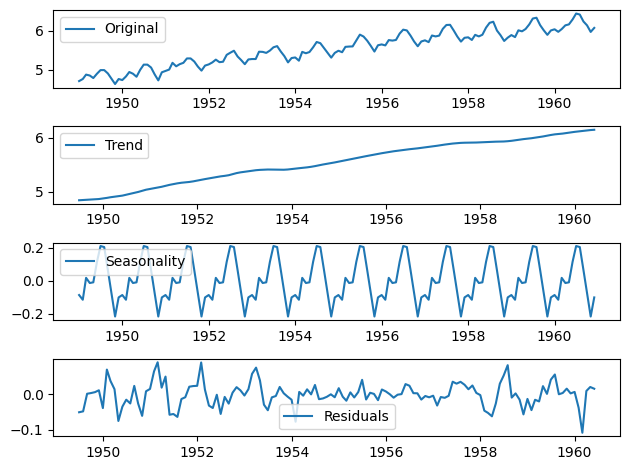

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(data_log)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()


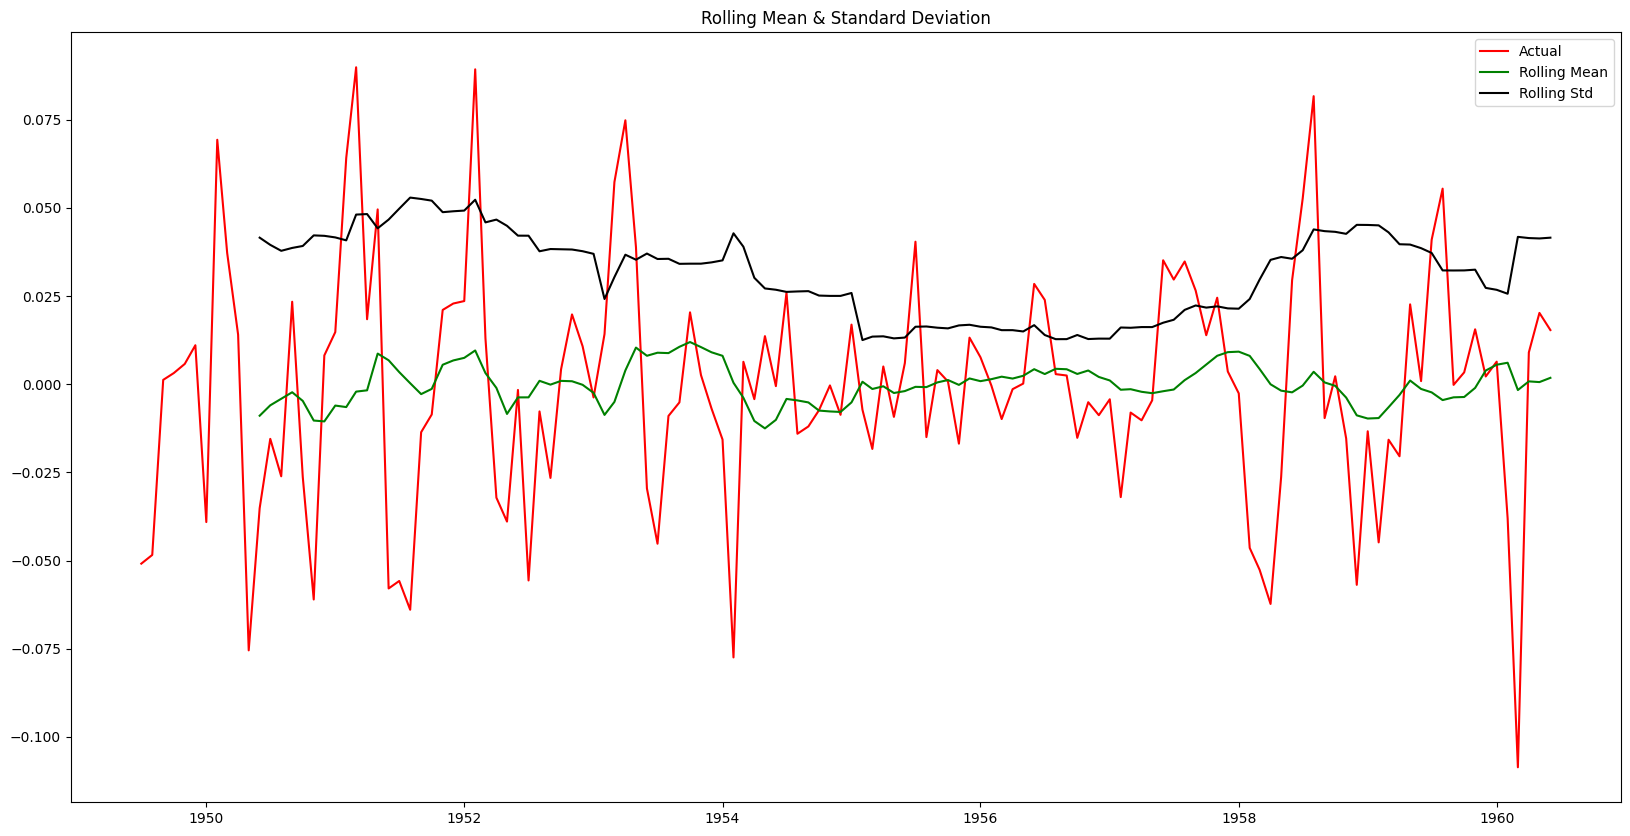

Dickey-Fuller Test: 


KeyError: ignored

In [ ]:
decomp_data = residual
decomp_data = decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Authocorrelation Function')

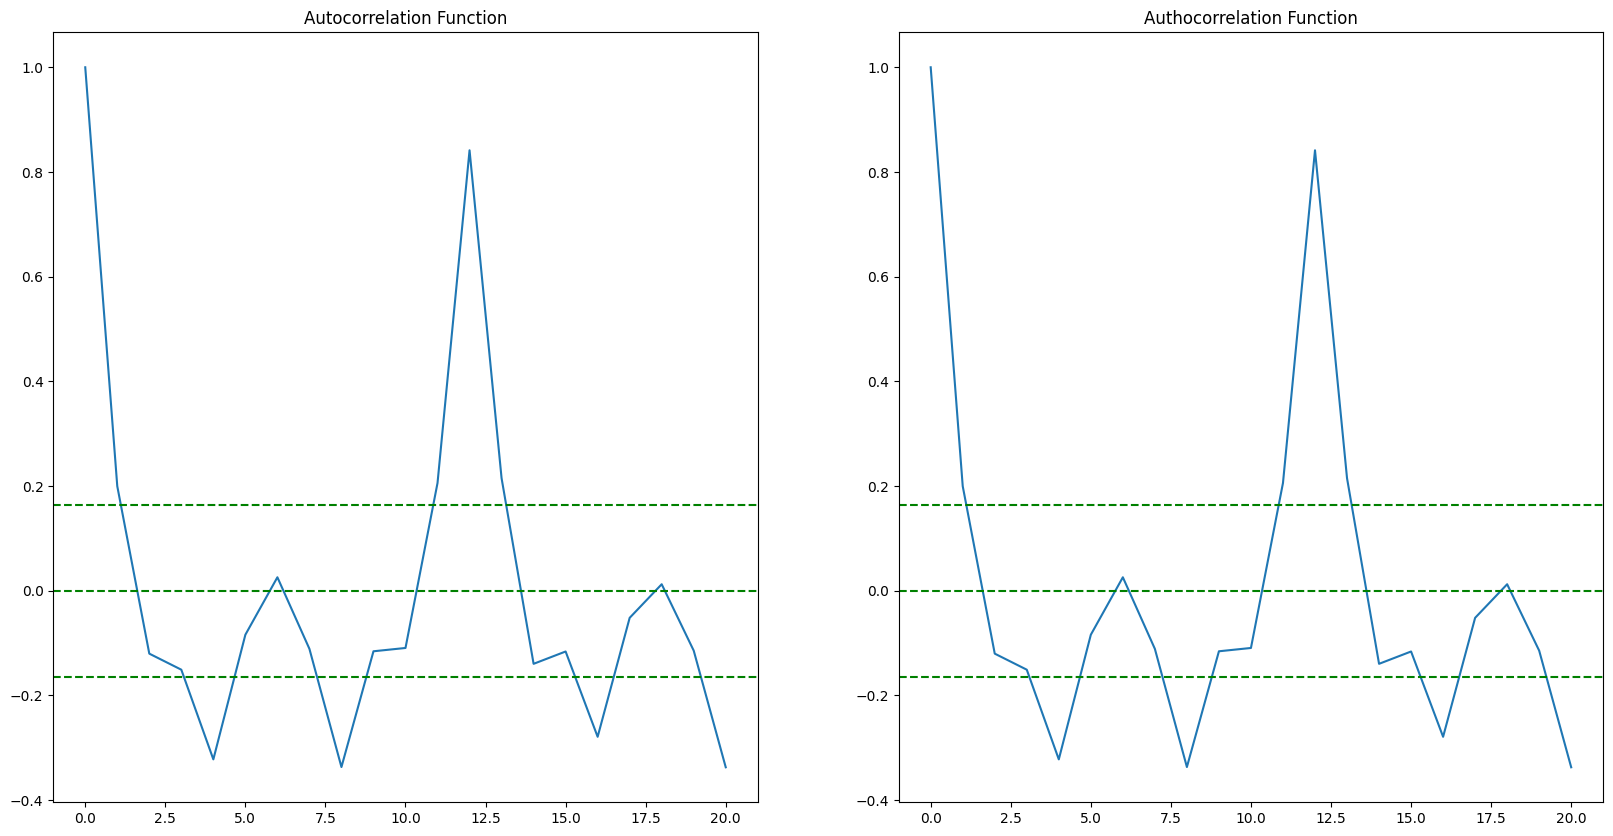

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data_shift, nlags = 20)
lag_pacf = pacf(data_shift, nlags = 20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--', color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--', color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--', color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--', color='green')
plt.title('Authocorrelation Function')

plotting ARIMA model


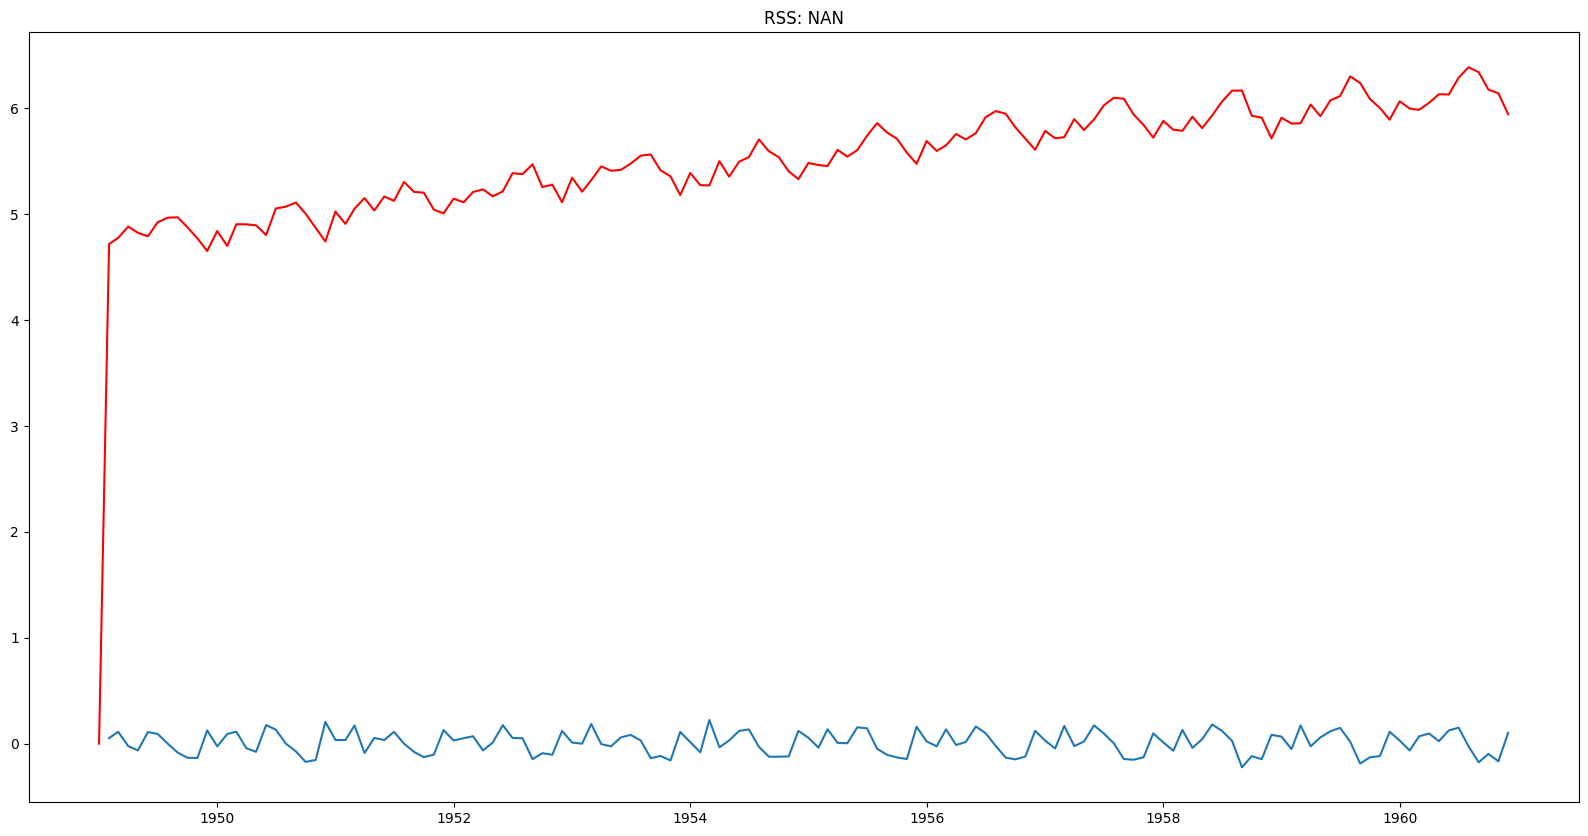

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

plt.figure(figsize = (20, 10))
model = sm.tsa.arima.ARIMA(data_log, order = (2,1,2))
results = model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4F'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [ ]:
predictions = pd.Series(results.fittedvalues, copy = True)
print(predictions.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824421
dtype: float64


In [ ]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378100
1949-05-01    19.202522
dtype: float64


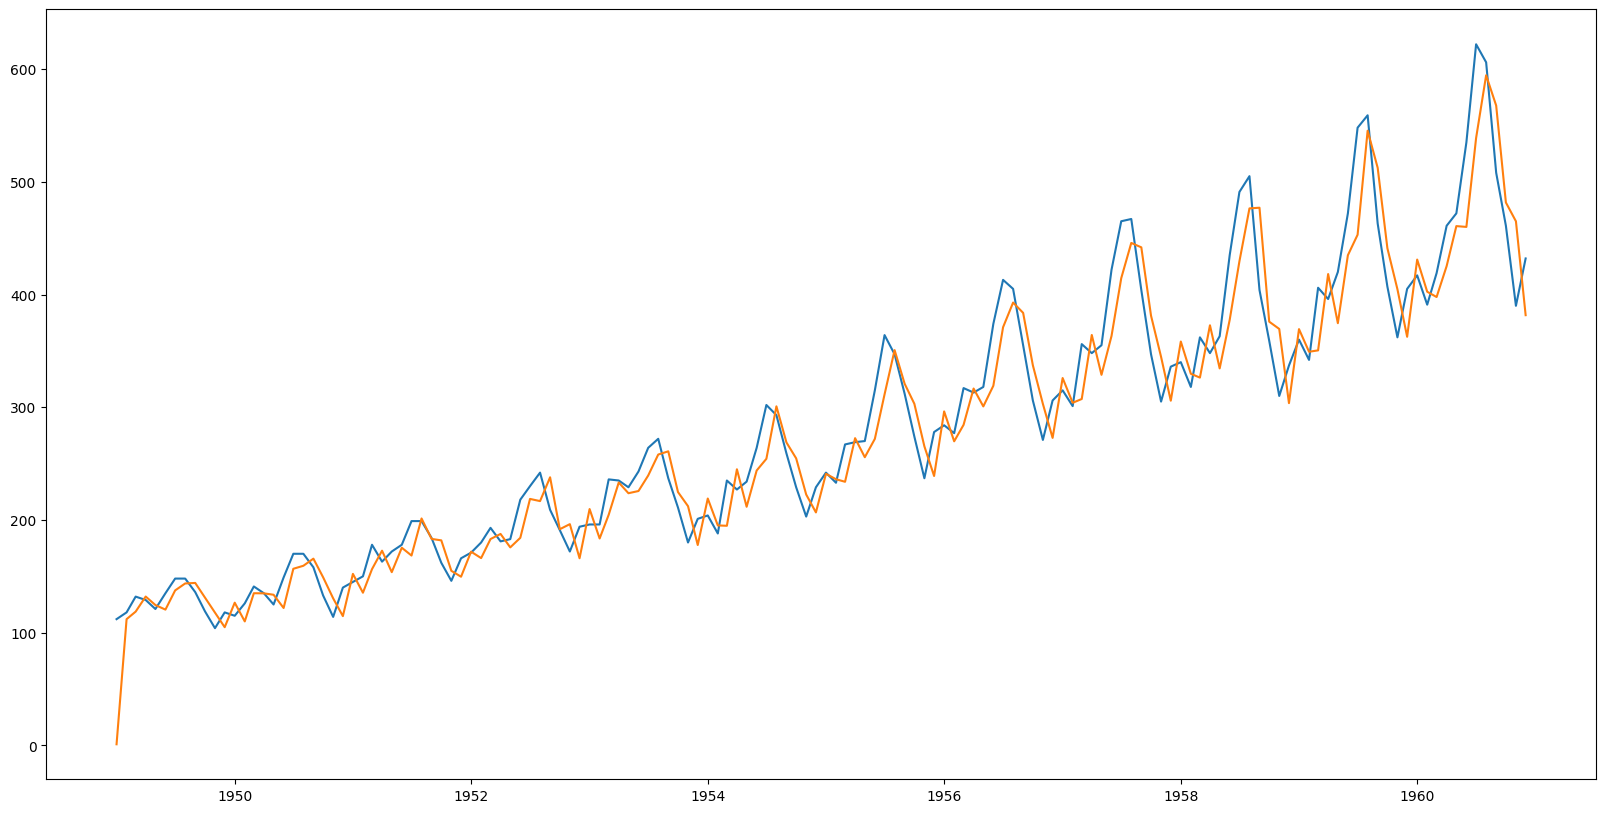

In [ ]:
predictions_ARIMA = np.exp(predictions)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
rcParams['figure.figsize']=20,10
results.predict(1, 204)
x = results.forecast(steps=120)

In [ ]:
results.forecast(steps=120)

1961-01-01    6.157565
1961-02-01    6.122239
1961-03-01    6.137509
1961-04-01    6.131767
1961-05-01    6.134458
                ...   
1970-08-01    6.134126
1970-09-01    6.134126
1970-10-01    6.134126
1970-11-01    6.134126
1970-12-01    6.134126
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64